In [2]:
import numpy as np
print(np.__version__)

import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("movimientos_bancarios.csv")
display(df.head())



meses = {
    "ene": "01", "feb": "02", "mar": "03", "abr": "04",
    "may": "05", "jun": "06", "jul": "07", "ago": "08",
    "sep": "09", "oct": "10", "nov": "11", "dic": "12"
}

df_fecha =df.copy()
# Cambio de abreviatura por número:
for esp, num in meses.items():
    df_fecha["Fecha_operacion"] = df_fecha["Fecha_operacion"].str.replace(esp,num, regex=False)

# Unirlo todo en formato reconocible para pandas (día, mes, año)
# Ej: "22 04 2025" lo transformamos a "22/04/2025"
df_fecha["Fecha_operacion"] = df_fecha["Fecha_operacion"].str.replace(" ", "/", n=2, regex=False)

# Convertimos ahora a datetime
df_fecha["Fecha_operacion"] = pd.to_datetime(df_fecha["Fecha_operacion"], format="%d/%m/%Y", errors="coerce")

#Comprobar que el cambio está bien realizado
df_fecha.info()
print(df_fecha["Fecha_operacion"].head())
df_fecha.sample()

df_fecha.to_csv("Movimientos_fecha_corregida.csv", index=False)



1.26.4


,Fecha_operacion,Operacion,Importe,Saldo
0,22 abr 2025,Transferencia Inmediata De Evelymar Bastidas R...,15.0,840.16
1,22 abr 2025,Transferencia Inmediata De Evelymar Bastidas R...,75.0,825.16
2,22 abr 2025,Transferencia Inmediata De Evelymar Bastidas R...,300.0,750.16
3,21 abr 2025,"Pago Movil En Heladeria Quint, Jinamar, Tarj. ...",-10.6,450.16
4,21 abr 2025,Bizum A Favor De Ruth Santana Gonzalez Concept...,-10.0,460.76


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha_operacion  1535 non-null   datetime64[ns]
 1   Operacion        1535 non-null   object        
 2   Importe          1535 non-null   float64       
 3   Saldo            1535 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 48.1+ KB
0   2025-04-22
1   2025-04-22
2   2025-04-22
3   2025-04-21
4   2025-04-21
Name: Fecha_operacion, dtype: datetime64[ns]


In [3]:
# Unir los CSV
df_1 = pd.read_csv('movimientos_bancarios_extraidos.csv')
df_2 = pd.read_csv('Movimientos_fecha_corregida.csv')

df_unido = pd.concat([df_1, df_2], ignore_index=True)


# Convertimos ahora a datetime
df_unido['Fecha_operacion'] = pd.to_datetime(df_unido['Fecha_operacion'], format='%Y-%m-%d', errors='coerce')


display(df_unido.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha_operacion  2361 non-null   datetime64[ns]
 1   Operacion        2361 non-null   object        
 2   Importe          2361 non-null   float64       
 3   Saldo            1847 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 73.9+ KB


None

In [4]:
# Corregimos nombres de las columnas
df_unido.columns = df_fecha.columns.str.lower().str.replace(" ", "_")
display(df_unido.head())


,fecha_operacion,operacion,importe,saldo
0,2021-09-23,TRANSFERENCIA DE EVELYMAR ESPERANZA BASTIDAS R...,175.0,NaN
1,2021-09-23,TRANSFERENCIA DE EVELYMAR ESPERANZA BASTIDAS R...,123.6,NaN
2,2021-09-23,TRANSFERENCIA DE EVELYMAR ESPERANZA BASTIDAS R...,55.0,NaN
3,2021-09-23,TRANSFERENCIA DE EVELYMAR ESPERANZA BASTIDAS R...,50.0,403.6
4,2021-09-24,"COMPRA PAGO M:VIL EN BURGER KING TOM, PALMAS (...",-9.0,NaN


In [24]:
def limpiar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r'https?://\S+', '', texto)                  # quitar URLs
    texto = re.sub(r'[\d]+', '', texto)                         # quitar números
    texto = re.sub(r'[\*\.,:;/\-_"\'\(\)]+', ' ', texto)        # quitar símbolos comunes
    texto = re.sub(r'\s+', ' ', texto).strip()                  # quitar espacios repetidos
    return texto

df_unido['operacion_limpia'] = df_unido['operacion'].apply(limpiar_texto)
display(df_unido.sample(10))

,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo,año_mes
1658,2024-03-05,"Compra Internet En Univ. Las Palma, Las Palmas...",-60.39,789.29,compra internet en univ las palma las palmas d...,gasto,2024-03
1338,2024-07-10,"Pago Movil En 2834 Tb Metropo, Madrid, Tarj. :...",-11.45,964.15,pago movil en tb metropo madrid tarj,gasto,2024-07
33,2021-10-25,"COMPRA PAGO M:VIL EN CAFETERIA AULAR, LAS PALM...",-1.90,8.51,compra pago m vil en cafeteria aular las palma...,gasto,2021-10
2074,2023-10-10,"Transferencia De Evelymar Bastidas Rosario, Co...",25.00,107.86,transferencia de evelymar bastidas rosario con...,ingreso,2023-10
1088,2024-11-25,"Pago Movil En Quinta Cumbre L, Las Palmas De, ...",-12.40,220.96,pago movil en quinta cumbre l las palmas de tarj,gasto,2024-11
665,2023-01-17,"PAGO MOVIL EN ORALE TACO MEX, TELDE, TARJ. :*5...",-19.80,NaN,pago movil en orale taco mex telde tarj,gasto,2023-01
1110,2024-11-18,"Pago Movil En Sagulpa / Elder, Las Palmas, Tar...",-1.25,863.24,pago movil en sagulpa elder las palmas tarj,gasto,2024-11
79,2021-11-30,TRANSFERENCIA DE EVELYMAR ESPERANZA BASTIDAS R...,100.00,NaN,transferencia de evelymar esperanza bastidas r...,ingreso,2021-11
1403,2024-06-20,Traspaso: Ahorro Hucha Objetivo: Regalo,-2.39,637.68,traspaso ahorro hucha objetivo regalo,gasto,2024-06
1710,2024-02-23,Bizum A Favor De Debora Vega Ravelo Concepto: ...,-45.00,306.96,bizum a favor de debora vega ravelo concepto p...,gasto,2024-02


In [6]:
df_unido["tipo"] = df_unido["importe"].apply(lambda i: "ingreso" if i > 0 else "gasto")
display(df_unido.sample(3))


,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo
431,2022-08-16,"PAGO MOVIL EN ALCAMPO TELDE, TELDE, TARJ. :*58...",-12.25,NaN,pago movil en alcampo telde telde tarj,gasto
1453,2024-05-30,"Pago Movil En Multi Tienda St, Las Palmas De, ...",-0.65,1589.22,pago movil en multi tienda st las palmas de tarj,gasto
219,2022-03-04,"COMPRA SpotifyES P1A1A2AF5D, Stockholm, TARJET...",-4.99,531.21,compra spotifyes paaafd stockholm tarjeta comi...,gasto


In [7]:
df_unido["año_mes"] = df_unido["fecha_operacion"].dt.to_period("M").astype(str)
display(df_unido.sample(5))
df_unido.info()

,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo,año_mes
1767,2024-01-31,"Pago Movil En Ikea Tienda Sue, Telde, Tarj. :*...",-14.60,1203.14,pago movil en ikea tienda sue telde tarj,gasto,2024-01
707,2023-02-12,"PAGO MOVIL EN BAZAR VALSEQUIL, VALSEQUILLO, TA...",-5.50,NaN,pago movil en bazar valsequil valsequillo tarj,gasto,2023-02
2201,2023-07-25,"Pago Movil En Hotel Escuela S, Las Palmas De, ...",-3.14,248.73,pago movil en hotel escuela s las palmas de tarj,gasto,2023-07
638,2022-12-28,"PAGO MOVIL EN LEFTIES ZARA RD, TELDE, TARJ. :*...",-12.59,NaN,pago movil en lefties zara rd telde tarj,gasto,2022-12
1616,2024-03-22,"Pago Movil En Conforama Tamar, Palmas (las), T...",-222.30,210.16,pago movil en conforama tamar palmas las tarj,gasto,2024-03


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha_operacion   2361 non-null   datetime64[ns]
 1   operacion         2361 non-null   object        
 2   importe           2361 non-null   float64       
 3   saldo             1847 non-null   float64       
 4   operacion_limpia  2361 non-null   object        
 5   tipo              2361 non-null   object        
 6   año_mes           2361 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 129.2+ KB


In [8]:
df_unido.columns

Index(['fecha_operacion', 'operacion', 'importe', 'saldo', 'operacion_limpia',
       'tipo', 'año_mes'],
      dtype='object')

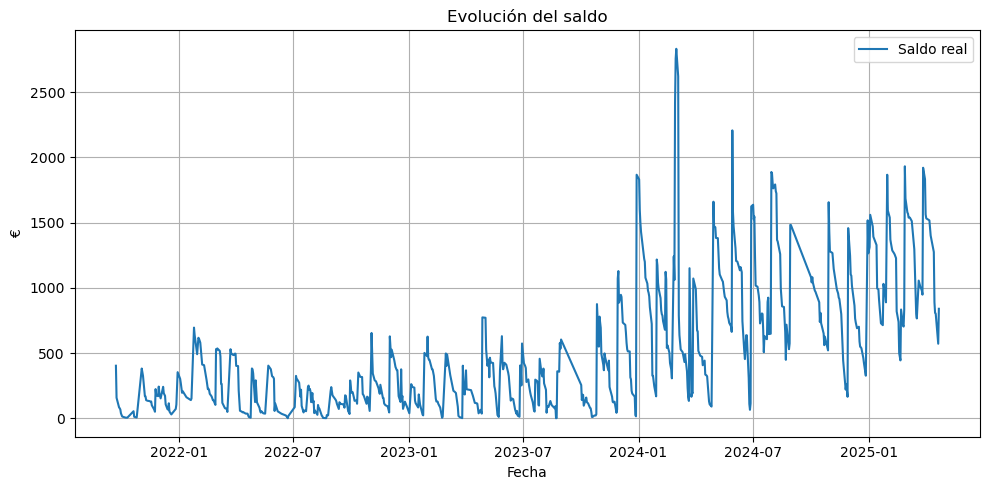

In [9]:
df_plot = df_unido.dropna(subset=["fecha_operacion", "saldo"])
df_plot = df_plot.sort_values("fecha_operacion")

# Agrupar por día y quedarte con el último saldo del día
df_diario = df_plot.groupby("fecha_operacion").last().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_diario["fecha_operacion"], df_diario["saldo"], label="Saldo real")
plt.legend()
plt.title("Evolución del saldo")
plt.xlabel("Fecha")
plt.ylabel("€")
plt.grid(True)
plt.tight_layout()
plt.show()

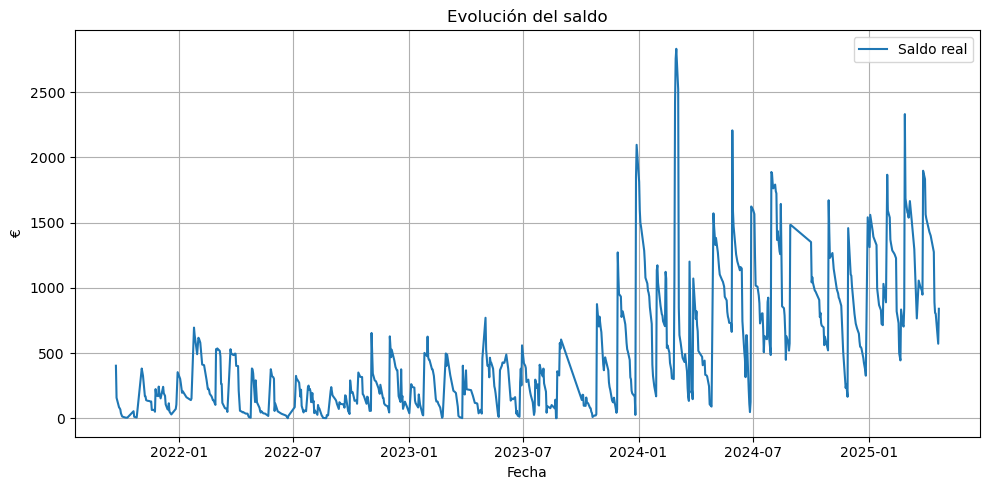

fecha_operacion                                   2024-03-01 00:00:00
operacion           Bizum De Eduardo Jesus Vega Cabello Concepto B...
importe                                                         99.06
saldo                                                         2856.17
operacion_limpia    bizum de eduardo jesus vega cabello concepto b...
tipo                                                          ingreso
año_mes                                                       2024-03
Name: 1688, dtype: object

In [10]:
# quitamos el valor atípico del saldo

# Lo ubicamos
df_unido.loc[df_unido['saldo'].idxmax()]

# Lo eliminamos
df_unido = df_unido[df_unido['fecha_operacion'] != '2024-08-09']
df_plot = df_plot.sort_values("fecha_operacion")

# Agrupar por día y quedarte con el último saldo del día
df_diario = df_plot.groupby("fecha_operacion").last().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_diario["fecha_operacion"], df_diario["saldo"], label="Saldo real")
plt.legend()
plt.title("Evolución del saldo")
plt.xlabel("Fecha")
plt.ylabel("€")
plt.grid(True)
plt.tight_layout()
plt.show()

df_unido.loc[df_unido['saldo'].idxmax()]


In [26]:
# Como ya no necesitamos la columna saldo, la eliminamos
df_unido = df_unido.drop(columns=["saldo"])

In [27]:
# lo guardamos en un nuevo CSV para trabajar sobre el nuevo formato datetime
df_unido.to_csv("Movimientos_limpios.csv", index=False)
df_verificacion = pd.read_csv("Movimientos_limpios.csv", parse_dates=['fecha_operacion'])
display(df_verificacion.sample(10))

,fecha_operacion,operacion,importe,operacion_limpia,tipo,año_mes
602,2022-12-14,BIZUM A FAVOR DE Debora Vega Ravelo CONCEPTO: ...,-3.70,bizum a favor de debora vega ravelo concepto d...,gasto,2022-12
2251,2023-06-29,"Transferencia De Evelymar Bastidas Rosario, Co...",318.00,transferencia de evelymar bastidas rosario con...,ingreso,2023-06
908,2025-03-03,"Pago Movil En Kiabi Telde, Telde, Tarj. :*179057",-7.00,pago movil en kiabi telde telde tarj,gasto,2025-03
1370,2024-06-27,"Compra Total Service Station, Kirchheim, Tarje...",-8.37,compra total service station kirchheim tarjeta...,gasto,2024-06
2161,2023-08-04,Traspaso: Ahorro Hucha Objetivo: Regalo,-0.60,traspaso ahorro hucha objetivo regalo,gasto,2023-08
1994,2023-11-14,Bizum De Debora Vega Ravelo Concepto Compras R...,65.00,bizum de debora vega ravelo concepto compras r...,ingreso,2023-11
1625,2024-03-18,"Compra H M, Tamaraceite, Tarjeta 5489010358179...",-25.98,compra h m tamaraceite tarjeta comision,gasto,2024-03
2332,2023-05-09,"Pago Movil En El Corral Clini, Telde, Tarj. :*...",-30.00,pago movil en el corral clini telde tarj,gasto,2023-05
2162,2023-08-04,"Compra Internet En Repsol Waylet, Madrid, Tarj...",-28.49,compra internet en repsol waylet madrid tarj,gasto,2023-08
2141,2023-08-08,"Pago Movil En Centro Hogar, Telde, Tarj. :*585729",-4.45,pago movil en centro hogar telde tarj,gasto,2023-08


In [28]:
df_verificacion.isnull().sum()

fecha_operacion     0
operacion           0
importe             0
operacion_limpia    0
tipo                0
año_mes             0
dtype: int64

In [29]:
df_categorias = df_verificacion.copy()

In [ ]:
# def clasificar_por_reglas(texto):
#     texto = str(texto).lower()

#     #Ingresos
#     if any(p in texto for p in ['transferencia inmediata de', 'transferencia de', 'transferencia recibida']):
#         return 'Ingreso'

    
#     if 'bizum de' in texto:
#         return 'Ingreso'
    
#     # Gastos

#     # Facturas
#     if 'recibo' in texto:
#         return 'Facturas'
    
#     # Préstamos
#     if 'liquidacion periodica' in texto:
#         return 'Prestamo'
    
#     # Transporte
#     gasolina = ['repsol', 'cepsa', 'bp', 'shell', 'gasolinera', 'disa']
#     if any (g in texto for g in gasolina):
#         return 'Transporte'
    
#     if 'guaguas' in texto or 'salcai' in texto or 'global' in texto:
#         return 'Transporte'
    
#     # Restauración
#     restaurantes = ['la sureña', 'goiko', 'vips','heladeria', 'picoteo', 'mc donald', 'burguer king', 'los charcones', 'quinta cumbre', 'bk', 'camaleon', 'tagliatella', 'bar', 'cafeteria', 'food', 'tb metropo', 'compra uber']
#     if any(r in texto for r in restaurantes):
#         return 'Restauracion'
    
#     # Supermercado
#     supermercado = ['mercadona', 'aldi', 'lidl', 'hiperdino', 'carrefour']
#     if any(s in texto for s in supermercado):
#         return 'Supermercado'
    
#     # Cuentas pagadas
#     if 'bizum a' in texto or 'transferencia a' in texto:
#         return 'Transferencia personal'
    
#     # Ocio y suscripciones
#     ocio = ['netflix', 'spotify', 'hbo', 'disney+', 'disney plus', 'amazon prime', 'filmin', 'nintendo', 'game pass']
#     if any(o in texto for o in ocio):
#         return 'Suscripciones'
    
#     # Compras no esenciales
#     compras_no_esenciales = ['mediamarkt', 'media markt', 'fnac', 'ikea', 'leroy merlin', 'decathlon', 'zara', 'shein', 'aliexpress', 'pull&bear', 'stradivarius', 'amazon']
#     if any(c in texto for c in compras_no_esenciales):
#         return 'Compras no esenciales'

#     return 'Sin categorizar'





In [37]:
def clasificar_por_reglas(texto):
    texto = str(texto).lower()

    # Ingresos
    if any(p in texto for p in ['transferencia inmediata de', 'transferencia de', 'transferencia recibida', 'reintegro']):
        return 'Ingreso'
    if 'bizum de' in texto:
        return 'Ingreso'

    # Cuentas pagadas / personales
    if 'bizum a' in texto or 'transferencia a' in texto or 'traspaso' in texto:
        return 'Transferencia personal'
    
    # Facturas
    if 'recibo' in texto or 'academia' in texto or 'univ' in texto:
        return 'Facturas'

    # Préstamos
    if 'liquidacion periodica' in texto:
        return 'Préstamo'
    
    # Compras no esenciales
    compras_no_esenciales = [
        'mediamarkt', 'media markt', 'fnac','ikea', 'leroy merlin', 'decathlon',
        'zara', 'shein', 'aliexpress', 'pull&bear', 'stradivarius', 'amazon', 'playstation',
        'viveros', 'zara home', 'idea market', 'playstation', 'tabaco', 'kiwoko',
        'primor', 'agroquimica', 'druni','kiwoko'
    ]
    if any(c in texto for c in compras_no_esenciales):
        return 'Compras no esenciales'

    # Restauración
    restaurantes = [
        'la sureña', 'goiko', 'vips', 'heladeria','pizza', 'hamburguesa','heladería', 'picoteo',
        'mcdonald', 'mc donald', 'burger king', 'burguer king', 'los charcones',
        'quinta cumbre', 'bk', 'camaleon', 'tagliatella', 'bar', 'cafeteria',
        'cafetería', 'food', 'tb metropo', 'compra uber', "llaollao", "compra sumup",
        'pasteleria', 'poke','las casitas', 'gelato', 'cantina', 'nothing', 'oakberry', 'restaurante'
    ]
    if any(r in texto for r in restaurantes):
        return 'Restauración'
    
    # Veterinario
    if 'el corral' in texto:
        return 'Veterinario'

    # Supermercado
    supermercado = ['mercadona', 'aldi', 'lidl', 'hiperdino', 'carrefour', 'alcampo', 'farmacia']
    if any(s in texto for s in supermercado):
        return 'Supermercado'

    # Suscripciones / ocio
    ocio = ['netflix', 'spotify', 'hbo', 'disney+', 'disney plus', 'amazon prime', 'filmin', 'nintendo', 'game pass', 'cine', 'artesiete', 'apple com']
    if any(o in texto for o in ocio):
        return 'Ocio / Suscripciones'

    
    # Transporte público
    if any(p in texto for p in ['guaguas', 'salcai', 'global']):
        return 'Transporte'

    # Transporte privado / gasolina
    gasolina = ['repsol', 'cepsa', 'bp', 'shell', 'gasolinera', 'disa', 'parking', 'motor telde', 'coche', 'rueda', 'gasolina', 'petroprix']
    if any(g in texto for g in gasolina):
        return 'Transporte'


    return 'Sin categorizar'

df_categorias["categoria"] = df_categorias["operacion_limpia"].apply(clasificar_por_reglas)
display(df_categorias[df_categorias["categoria"] == "Sin categorizar"])

,fecha_operacion,operacion,importe,operacion_limpia,tipo,año_mes,categoria
9,2021-09-25,"COMPRA PAGO M:VIL EN MCDONAL TRIANA, PALMAS (L...",-6.50,compra pago m vil en mcdonal triana palmas las...,gasto,2021-09,Sin categorizar
11,2021-09-26,"COMPRA PAGO M:VIL EN SPAR AMADORES, PUERTO RIC...",-4.77,compra pago m vil en spar amadores puerto rico...,gasto,2021-09,Sin categorizar
17,2021-09-28,"TRANSACCION CONTACTLESS EN HD C.C. ALISIOS, PA...",-1.99,transaccion contactless en hd c c alisios palm...,gasto,2021-09,Sin categorizar
19,2021-09-30,"COMPRA Altafit Vegueta GC, Las Palmas de, TARJ...",-9.90,compra altafit vegueta gc las palmas de tarjet...,gasto,2021-09,Sin categorizar
21,2021-10-04,"COMPRA PAGO M:VIL EN TACO BELL LAS A, LAS PALM...",-3.95,compra pago m vil en taco bell las a las palma...,gasto,2021-10,Sin categorizar
...,...,...,...,...,...,...,...
2319,2023-05-18,"Pago Movil En El Bosque Encan, Gran Canaria, T...",-20.90,pago movil en el bosque encan gran canaria tarj,gasto,2023-05,Sin categorizar
2322,2023-05-15,"Pago Movil En Minimarket La X, Las Palmas, Tar...",-0.85,pago movil en minimarket la x las palmas tarj,gasto,2023-05,Sin categorizar
2329,2023-05-11,"Pago Movil En Punto Coma, Palmas (las), Tarj. ...",-2.55,pago movil en punto coma palmas las tarj,gasto,2023-05,Sin categorizar
2335,2023-05-08,"Pago Movil En Shalom Restaura, Teror, Tarj. :*...",-7.90,pago movil en shalom restaura teror tarj,gasto,2023-05,Sin categorizar


In [38]:
# 1 Preparar los datos
df_etiquetado = df_categorias[df_categorias['categoria'] != 'Sin categorizar'].copy()
display(df_etiquetado.sample(10))

,fecha_operacion,operacion,importe,operacion_limpia,tipo,año_mes,categoria
1863,2023-12-22,"Pago Movil En Artesiete Las T, Hornos Del Re, ...",-1.20,pago movil en artesiete las t hornos del re tarj,gasto,2023-12,Ocio / Suscripciones
2049,2023-10-19,"Pago Movil En Lidl Can-gc-tel, Llanos De La, T...",-34.78,pago movil en lidl can gc tel llanos de la tarj,gasto,2023-10,Supermercado
1682,2024-02-29,Traspaso: Ahorro Hucha Objetivo: Regalo,-17.57,traspaso ahorro hucha objetivo regalo,gasto,2024-02,Transferencia personal
1259,2024-08-12,"Pago Movil En Picoteo Casa Ch, Telde, Tarj. :*...",-23.70,pago movil en picoteo casa ch telde tarj,gasto,2024-08,Restauración
2193,2023-07-25,Bizum De Debora Vega Ravelo Concepto .,11.20,bizum de debora vega ravelo concepto,ingreso,2023-07,Ingreso
790,2023-04-10,"COMPRA APPLE.COM/BILL, 900812703, TARJETA 5163...",-8.99,compra apple com bill tarjeta comision,gasto,2023-04,Ocio / Suscripciones
2067,2023-10-10,"Transferencia De Evelymar Bastidas Rosario, Co...",25.00,transferencia de evelymar bastidas rosario con...,ingreso,2023-10,Ingreso
1637,2024-03-11,"Pago Movil En Mcdonalds Telde, Telde, Tarj. :*...",-8.12,pago movil en mcdonalds telde telde tarj,gasto,2024-03,Restauración
199,2022-02-17,TRANSFERENCIA DE Oscar Alejandro Gomez Bastida...,6.00,transferencia de oscar alejandro gomez bastida...,ingreso,2022-02,Ingreso
830,2025-04-21,Bizum A Favor De Ruth Santana Gonzalez Concept...,-10.00,bizum a favor de ruth santana gonzalez concept...,gasto,2025-04,Transferencia personal


In [39]:
# 2 Separar texto y etiquetas
x_texto = df_etiquetado['operacion_limpia']
y_etiqueta = df_etiquetado['categoria']

In [40]:
# 2. Guardar los textos en una lista para revisarlos luego
textos_originales = x_texto.tolist()

In [41]:
#3 Vectorizar el texto con TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_vect = vectorizer.fit_transform(x_texto)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, x_text_train, x_text_test = train_test_split(
    X_vect, y_etiqueta, textos_originales, test_size=0.2, random_state=42
)


In [43]:
from sklearn.ensemble import RandomForestClassifier

modelo= RandomForestClassifier()
modelo.fit(x_train, y_train)

RandomForestClassifier()

Accuracy 0.9778481012658228
Reporte de clasificación:
                        precision    recall  f1-score   support

 Compras no esenciales       1.00      0.83      0.91        24
              Facturas       1.00      1.00      1.00        26
               Ingreso       1.00      1.00      1.00        58
  Ocio / Suscripciones       1.00      1.00      1.00        29
              Préstamo       1.00      1.00      1.00         4
          Restauración       0.88      1.00      0.94        53
          Supermercado       1.00      0.93      0.96        27
Transferencia personal       1.00      1.00      1.00        54
            Transporte       1.00      0.97      0.99        37
           Veterinario       1.00      1.00      1.00         4

              accuracy                           0.98       316
             macro avg       0.99      0.97      0.98       316
          weighted avg       0.98      0.98      0.98       316



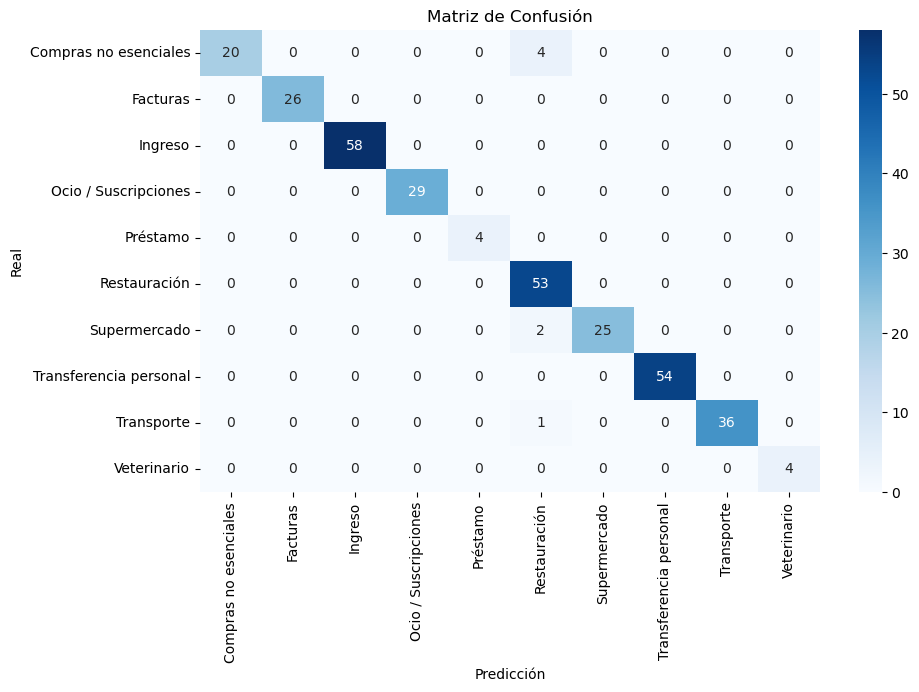

,texto,real,predicho
12,pago movil en druni s a palmas de gra tarj,Compras no esenciales,Restauración
40,pago movil en lefties zara rd telde tarj,Compras no esenciales,Restauración
81,pago movil en parking palmas de gra tarj,Transporte,Restauración
135,pago movil en kiwoko alisios toscon bajo tarj,Compras no esenciales,Restauración
173,transaccion contactless en carrefour lpalm pal...,Supermercado,Restauración
271,pago movil en farmacia clara valsequillo tarj,Supermercado,Restauración
285,pago movil en idea market telde tarj,Compras no esenciales,Restauración


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predice sobre el conjunto de prueba
y_pred = modelo.predict(x_test)

# Exactitud global
print('Accuracy', accuracy_score(y_test, y_pred))

# Informe por clase
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de confusión 
import seaborn as sns 

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=modelo.classes_, yticklabels=modelo.classes_, cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 7. Revisar predicciones incorrectas
errores = pd.DataFrame({
    'texto': x_text_test,
    'real': y_test.values,
    'predicho': y_pred
})
errores = errores[errores['real'] != errores['predicho']]

# Mostrar errores
display(errores.head(15))

In [45]:
# Seleccionar solo los movimientos sin categoría
df_sin_etiquetar = df_categorias[df_categorias['categoria'] == 'Sin categorizar'].copy()


In [46]:
# Vectorizar esos nuevos textos con el vectorizer que ya tienes
x_nuevos = vectorizer.transform(df_sin_etiquetar['operacion_limpia'])

In [47]:
# predecir las categorías
df_sin_etiquetar['categoria_predicha'] = modelo.predict(x_nuevos)

In [49]:
# Ver los resultados
display(df_sin_etiquetar[['operacion_limpia', 'categoria_predicha']].sample(55))
df_sin_etiquetar.info()
df_sin_etiquetar[df_sin_etiquetar['categoria'] == 'Sin categorizar'].shape[0]


,operacion_limpia,categoria_predicha
2221,pago movil en foto color rima las palmas tarj,Compras no esenciales
1797,pago movil en lacan farray las palmas de tarj,Restauración
586,pago movil en laiba doner keb telde tarj,Supermercado
1557,pago movil en martin valeron telde tarj,Supermercado
1650,pago movil en martin valeron telde tarj,Supermercado
1162,pago movil en hd melenara telde tarj,Supermercado
444,pago movil en llao llao palmas de gra tarj,Compras no esenciales
901,transferencia inmediata a favor de viajes insu...,Transferencia personal
2011,pago movil en ilusiona las pa palmas las tarj,Restauración
1870,pago movil en hd melenara telde tarj,Supermercado


<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 9 to 2338
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha_operacion     777 non-null    datetime64[ns]
 1   operacion           777 non-null    object        
 2   importe             777 non-null    float64       
 3   operacion_limpia    777 non-null    object        
 4   tipo                777 non-null    object        
 5   año_mes             777 non-null    object        
 6   categoria           777 non-null    object        
 7   categoria_predicha  777 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 54.6+ KB


777

In [24]:
# 4. Actualizar el DataFrame original usando índices
df_categorias.loc[df_sin_etiquetar.index, 'categoria'] = df_sin_etiquetar['categoria_predicha'].values

# 5. Añadir columna origen
df_categorias['origen'] = 'manual'
df_categorias.loc[df_sin_etiquetar.index, 'origen'] = 'modelo'
display(df_categorias.sample(15))
df_categorias[df_categorias['categoria'] == 'Sin categorizar'].shape[0]


,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo,año_mes,categoria,origen
1428,2023-06-30,"Pago Movil En Kiwoko Telde La, Cruz De La Ga, ...",-8.50,574.12,pago movil en kiwoko telde la cruz de la ga tarj,gasto,2023-06,Compras no esenciales,manual
377,2024-08-29,"Pago Movil En Pasteleria Yera, La Estrella, Ta...",-4.50,570.18,pago movil en pasteleria yera la estrella tarj,gasto,2024-08,Restauración,manual
1396,2023-07-14,"Compra La Pizzeria Arinaga, Arinaga, Tarjeta 5...",-23.00,175.80,compra la pizzeria arinaga arinaga tarjeta com...,gasto,2023-07,Restauración,modelo
1137,2023-11-28,Traspaso: Ahorro Hucha Objetivo: Regalo,-0.30,42.23,traspaso ahorro hucha objetivo regalo,gasto,2023-11,Transferencia personal,manual
350,2024-10-14,"Compra Telde Cc Alcampo Pax, Telde, Tarjeta 54...",-31.08,831.69,compra telde cc alcampo pax telde tarjeta comi...,gasto,2024-10,Supermercado,manual
861,2024-03-01,"Pago Movil En Cerveceria Mave, Telde, Tarj. :*...",-29.90,2826.27,pago movil en cerveceria mave telde tarj,gasto,2024-03,Supermercado,modelo
743,2024-04-08,"Compra Playstation Network, Hilversum, Tarjeta...",-8.99,480.65,compra playstation network hilversum tarjeta c...,gasto,2024-04,Compras no esenciales,manual
261,2024-11-25,Bizum De Debora Vega Ravelo Concepto Todo Saldado,70.00,290.96,bizum de debora vega ravelo concepto todo saldado,ingreso,2024-11,Ingreso,manual
874,2024-02-26,"Pago Movil En Martin Valeron, Telde, Tarj. :*1...",-5.90,1162.78,pago movil en martin valeron telde tarj,gasto,2024-02,Supermercado,modelo
1461,2023-06-09,"Compra Internet En Repsol Waylet, Madrid, Tarj...",-28.51,321.85,compra internet en repsol waylet madrid tarj,gasto,2023-06,Transporte,manual


0

In [25]:
# df_categorias.to_csv("Movimientos_categorizados.csv", index=False)

In [26]:
df_categorias = pd.read_csv('Movimientos_categorizados.csv')

In [27]:
df_categorias[df_categorias['origen'] == 'modelo'].head(20)

,fecha_operacion,operacion,importe,saldo,operacion_limpia,tipo,año_mes,categoria,origen
7,2025-04-21,"Compra Apple.com/bill, 900812703, Tarjeta 5489...",-9.99,495.46,compra apple com bill tarjeta comision,gasto,2025-04,Compras no esenciales,modelo
13,2025-04-21,"Pago Movil En Hd Melenara, Telde, Tarj. :*179057",-105.04,687.34,pago movil en hd melenara telde tarj,gasto,2025-04,Supermercado,modelo
15,2025-04-17,"Compra Apple.com/bill, 900812703, Tarjeta 5489...",-4.99,803.33,compra apple com bill tarjeta comision,gasto,2025-04,Compras no esenciales,modelo
21,2025-04-14,"Compra Apple.com/bill, Itunes.com, Tarjeta 548...",-3.49,1259.76,compra apple com bill itunes com tarjeta comision,gasto,2025-04,Compras no esenciales,modelo
22,2025-04-14,"Pago Movil En Fruta Y Verdura, Valsequillo, Ta...",-12.19,1263.25,pago movil en fruta y verdura valsequillo tarj,gasto,2025-04,Compras no esenciales,modelo
24,2025-04-14,"Pago Movil En E.s. Las Terraz, Hornos Del Re, ...",-10.00,1322.79,pago movil en e s las terraz hornos del re tarj,gasto,2025-04,Supermercado,modelo
26,2025-04-14,"Pago Movil En Domyhome, Telde, Tarj. :*179057",-1.50,1399.46,pago movil en domyhome telde tarj,gasto,2025-04,Supermercado,modelo
28,2025-04-07,"Compra Nyx*airservspain, Sansebastiand, Tarjet...",-1.00,1422.96,compra nyx airservspain sansebastiand tarjeta ...,gasto,2025-04,Compras no esenciales,modelo
29,2025-04-07,"Pago Movil En La Surena, Palmas De Gra, Tarj. ...",-5.00,1423.96,pago movil en la surena palmas de gra tarj,gasto,2025-04,Restauración,modelo
40,2025-03-31,"Pago Movil En Panera, Valsequillo, Tarj. :*179057",-8.95,1756.56,pago movil en panera valsequillo tarj,gasto,2025-03,Compras no esenciales,modelo


# Prediccion del gasto / ingreso



In [28]:
df_gasto = df_categorias[df_categorias['tipo'] == 'gasto'].copy()
gastos_mensuales = df_gasto.groupby(['año_mes', 'categoria'])['importe'].sum().unstack(fill_value=0)
display(gastos_mensuales)

categoria,Compras no esenciales,Facturas,Ocio / Suscripciones,Préstamo,Restauración,Supermercado,Transferencia personal,Transporte,Veterinario
año_mes,,,,,,,,,
2023-04,-8.05,0.00,0.00,0.00,-4.10,-11.68,0.00,-28.82,0.00
2023-05,-132.59,-229.93,-9.99,0.00,-72.45,-399.89,-240.50,-143.03,-225.11
2023-06,-102.93,-205.43,-9.99,0.00,-18.88,-205.03,-542.93,-155.05,-14.07
2023-07,-196.37,-123.72,-19.79,0.00,-101.69,-320.23,-171.62,-174.19,0.00
2023-08,-69.43,-58.43,-9.99,0.00,-226.96,-252.01,-186.59,-195.19,0.00
2023-10,-178.25,-58.43,-10.99,0.00,-191.50,-384.87,-212.70,-45.57,0.00
2023-11,-689.95,-155.83,-46.89,0.00,-340.47,-314.22,-593.98,-154.26,0.00
2023-12,-490.36,-174.58,-32.79,0.00,-429.89,-335.84,-541.00,-183.70,0.00
2024-01,-599.46,-173.39,-14.99,0.00,-156.85,-297.71,-1086.98,-76.72,0.00


In [29]:
# Se usará prophet modelo de Meta para realizar predicciones  de series temporales 
df_gasto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 3 to 1533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha_operacion   1296 non-null   object 
 1   operacion         1296 non-null   object 
 2   importe           1296 non-null   float64
 3   saldo             1296 non-null   float64
 4   operacion_limpia  1296 non-null   object 
 5   tipo              1296 non-null   object 
 6   año_mes           1296 non-null   object 
 7   categoria         1296 non-null   object 
 8   origen            1296 non-null   object 
dtypes: float64(2), object(7)
memory usage: 101.2+ KB


In [30]:
# Preparar datos para Prophet para compras no escenciales
from prophet import Prophet
df_prophet = gastos_mensuales['Compras no esenciales'].reset_index()
df_prophet.columns = ['ds','y']
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Se crea y entrena Prophet
modelo_prophet = Prophet()
modelo_prophet.fit(df_prophet)

# Generar fechas futuras y predecir
futuro = modelo_prophet.make_future_dataframe(periods = 6, freq='M')
forecast = modelo_prophet.predict(futuro)

# Mostrar predicciones
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:51:20 - cmdstanpy - INFO - Chain [1] start processing
16:51:20 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
0,2023-04-01,-221.985971,-613.381225,208.908243
1,2023-05-01,-413.454522,-857.388897,2.243366
2,2023-06-01,-318.638813,-772.366010,108.214920
3,2023-07-01,-331.002867,-743.624248,113.515150
4,2023-08-01,-123.890032,-576.490058,302.240953
5,2023-10-01,-145.533429,-564.714359,305.970527
6,2023-11-01,-673.380392,-1103.371745,-271.939468
7,2023-12-01,-528.004834,-940.183253,-86.267907
8,2024-01-01,-715.330638,-1174.359832,-291.854749
9,2024-02-01,-468.410991,-859.725682,0.269265


In [31]:
# 1. Selección y formateo de la categoría
df_prophet = gastos_mensuales['Compras no esenciales'].reset_index()
df_prophet.columns = ['ds','y']
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet['y'] = df_prophet['y'].abs()

# 2. Guardar valores reales de enero a abril de 2025
reales = df_prophet[df_prophet['ds'] > '2024-12-31'][['ds', 'y']]
reales['ds'] = reales['ds'] + pd.offsets.MonthEnd(0)  # para alinear con Prophet

# 3. Filtrar entrenamiento hasta diciembre 2024
# Calcular la mediana sin el valor atípico
mediana = df_prophet[df_prophet['ds'] != '2024-03-01']['y'].median()

# Reemplazar el valor atípico
df_prophet.loc[df_prophet['ds'] == '2024-03-01', 'y'] = mediana
df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31'].copy()

# 4. Crear y entrenar el modelo
modelo_prophet = Prophet(
    changepoint_prior_scale=0.01,
    seasonality_mode='multiplicative',
    interval_width=0.95
)
modelo_prophet.fit(df_entrenamiento)


# 5. Predecir 4 meses futuros
futuro = modelo_prophet.make_future_dataframe(periods=5, freq='ME')
forecast = modelo_prophet.predict(futuro)

# 6. Seleccionar predicciones futuras
forecast_test = forecast[forecast['ds'] > '2024-12-31'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# 7. Comparar con los datos reales
comparacion = pd.merge(forecast_test, reales, on='ds', how='left')
comparacion = comparacion[['ds', 'yhat', 'y','yhat_lower', 'yhat_upper']]
comparacion = comparacion.rename(columns={
    'ds': 'Fecha',
    'yhat': 'Predicción (€)',
    'yhat_lower': 'Límite inferior (€)',
    'yhat_upper': 'Límite superior (€)',
    'y': 'Real (€)'
})

# 8. Mostrar resultados
pd.set_option('display.float_format', '{:,.2f}'.format)
display(comparacion)

from sklearn.metrics import mean_absolute_error

mae_prophet = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción (€)'])
print(f"✅ MAE Prophet: {mae_prophet:.2f} €")



16:51:20 - cmdstanpy - INFO - Chain [1] start processing
16:51:20 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,484.16,154.84,131.78,876.71
1,2025-02-28,496.96,115.06,114.86,885.79
2,2025-03-31,511.12,107.51,167.33,893.45
3,2025-04-30,524.83,216.29,179.84,896.51


✅ MAE Prophet: 355.84 €


In [32]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

# ========================
# 1. Preparar la serie
# ========================

serie = gastos_mensuales['Compras no esenciales'].copy()

# Convertir índice a datetime si es str (caso de año_mes tipo '2023-04')
if not isinstance(serie.index, pd.DatetimeIndex):
    serie.index = pd.to_datetime(serie.index)

# Asegurar orden y frecuencia mensual
serie = serie.sort_index()
serie = serie.asfreq('MS')  # frecuencia mensual start of month

# ===============================
# 2. Reemplazar el valor atípico (2024-03-01) por la mediana
# ===============================
mediana = serie[serie.index != '2024-03-01'].median()
serie.loc['2024-03-01'] = mediana

# ========================
# 2. Entrenar con datos hasta dic 2024
# ========================
serie_entrenamiento = serie['2023-04-01':'2024-12-01'].abs()
modelo_arima = ARIMA(serie_entrenamiento, order=(1, 1, 1))
modelo_fit = modelo_arima.fit()

# ========================
# 3. Predecir enero-abril 2025
# ========================
predicciones = modelo_fit.forecast(steps=4)
fechas_pred = pd.date_range(start='2025-01-01', periods=4, freq='MS')
predicciones.index = fechas_pred

# ========================
# 4. Reales
# ========================
serie_reales = serie['2025-01-01':'2025-04-01'].abs()
serie_reales = serie_reales.reindex(fechas_pred)

# ========================
# 5. Tabla comparativa
# ========================
comparacion = pd.DataFrame({
    'Fecha': fechas_pred,
    'Predicción ARIMA (€)': predicciones.values,
    'Real (€)': serie_reales.values
})

pd.set_option('display.float_format', '{:,.2f}'.format)
display(comparacion)

from sklearn.metrics import mean_absolute_error

# Calcular error absoluto medio
mae_arima = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción ARIMA (€)'])

print(f"✅ MAE ARIMA tras ajuste: {mae_arima:.2f} €")



,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,399.80,154.84
1,2025-02-01,381.35,115.06
2,2025-03-01,378.81,107.51
3,2025-04-01,378.45,216.29


✅ MAE ARIMA tras ajuste: 236.18 €


In [36]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import pandas as pd

def predecir_categoria_con_prophet(nombre_categoria):
    # 1. Selección y formateo de la categoría
    df_prophet = gastos_mensuales[nombre_categoria].reset_index()
    df_prophet.columns = ['ds', 'y']
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
    df_prophet['y'] = df_prophet['y'].abs()

    print(f'Prophet - categoría:{nombre_categoria}')
    # 2. Guardar valores reales de enero a abril de 2025
    reales = df_prophet[df_prophet['ds'] > '2024-12-31'][['ds', 'y']]
    reales['ds'] = reales['ds'] + pd.offsets.MonthEnd(0)  # Alinear con Prophet

    # 3. 
    df_entrenamiento = df_prophet[df_prophet['ds'] <= '2024-12-31'].copy()

    # 4. Crear y entrenar el modelo Prophet
    modelo_prophet = Prophet(
        changepoint_prior_scale=0.1,
        seasonality_mode='multiplicative',
        interval_width=0.95
    )
    modelo_prophet.fit(df_entrenamiento)

    # 5. Predecir 4 meses futuros
    futuro = modelo_prophet.make_future_dataframe(periods=5, freq='ME')
    forecast = modelo_prophet.predict(futuro)

    # 6. Seleccionar predicciones futuras
    forecast_test = forecast[forecast['ds'] > '2024-12-31'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # 7. Comparar con los datos reales
    comparacion = pd.merge(forecast_test, reales, on='ds', how='left')
    comparacion = comparacion[['ds', 'yhat', 'y', 'yhat_lower', 'yhat_upper']]
    comparacion = comparacion.rename(columns={
        'ds': 'Fecha',
        'yhat': 'Predicción (€)',
        'yhat_lower': 'Límite inferior (€)',
        'yhat_upper': 'Límite superior (€)',
        'y': 'Real (€)'
    })

    # 8. Mostrar resultados y MAE
    pd.set_option('display.float_format', '{:,.2f}'.format)
    display(comparacion)
 
    mae_prophet = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción (€)'])
    print(f"✅ MAE Prophet para '{nombre_categoria}': {mae_prophet:.2f} €")


predecir_categoria_con_prophet('Transferencia personal')
predecir_categoria_con_prophet('Compras no esenciales')
predecir_categoria_con_prophet('Facturas')
predecir_categoria_con_prophet('Préstamo')
predecir_categoria_con_prophet('Ocio / Suscripciones')
predecir_categoria_con_prophet('Veterinario')
predecir_categoria_con_prophet('Restauración')
predecir_categoria_con_prophet('Supermercado')
predecir_categoria_con_prophet('Transporte')


16:52:17 - cmdstanpy - INFO - Chain [1] start processing
16:52:17 - cmdstanpy - INFO - Chain [1] done processing


Prophet - categoría:Transferencia personal


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,"2,627.75",402.50,"-1,702.46","7,087.10"
1,2025-02-28,"2,740.60",409.00,"-1,987.58","7,381.76"
2,2025-03-31,"2,865.54",688.40,"-1,696.71","7,972.33"
3,2025-04-30,"2,986.45",10.00,"-1,691.47","7,545.45"


16:52:17 - cmdstanpy - INFO - Chain [1] start processing
16:52:17 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Transferencia personal': 2427.61 €
Prophet - categoría:Compras no esenciales


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,665.60,154.84,-440.09,"1,786.81"
1,2025-02-28,682.46,115.06,-327.09,"1,674.96"
2,2025-03-31,701.13,107.51,-347.72,"1,743.93"
3,2025-04-30,719.19,216.29,-293.96,"1,764.58"


16:52:17 - cmdstanpy - INFO - Chain [1] start processing


✅ MAE Prophet para 'Compras no esenciales': 543.67 €
Prophet - categoría:Facturas


16:52:17 - cmdstanpy - INFO - Chain [1] done processing


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,308.85,510.23,65.14,550.11
1,2025-02-28,317.37,565.70,85.54,547.87
2,2025-03-31,326.79,510.98,81.56,589.43
3,2025-04-30,335.91,510.98,95.04,576.93


16:52:18 - cmdstanpy - INFO - Chain [1] start processing
16:52:18 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Facturas': 202.24 €
Prophet - categoría:Préstamo


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,167.03,197.19,-38.66,355.70
1,2025-02-28,176.53,197.19,-26.25,380.82
2,2025-03-31,187.05,0.00,-11.04,388.87
3,2025-04-30,197.23,197.19,3.38,401.72


16:52:18 - cmdstanpy - INFO - Chain [1] start processing
16:52:18 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Préstamo': 59.48 €
Prophet - categoría:Ocio / Suscripciones


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,28.54,14.99,8.32,48.24
1,2025-02-28,29.20,14.99,9.22,50.49
2,2025-03-31,29.93,14.99,10.82,51.02
3,2025-04-30,30.63,0.00,9.47,50.17


16:52:18 - cmdstanpy - INFO - Chain [1] start processing
16:52:18 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Ocio / Suscripciones': 18.33 €
Prophet - categoría:Veterinario


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,-8.96,137.36,-116.12,101.58
1,2025-02-28,-11.47,206.49,-118.67,105.06
2,2025-03-31,-14.25,0.00,-116.10,89.63
3,2025-04-30,-16.94,0.00,-125.40,83.71


16:52:18 - cmdstanpy - INFO - Chain [1] start processing
16:52:18 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Veterinario': 98.87 €
Prophet - categoría:Restauración


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,290.16,71.03,-5.26,592.98
1,2025-02-28,295.70,135.30,11.70,579.28
2,2025-03-31,301.85,226.40,30.16,579.77
3,2025-04-30,307.79,130.52,-4.24,587.06


16:52:18 - cmdstanpy - INFO - Chain [1] start processing
16:52:18 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Restauración': 158.06 €
Prophet - categoría:Supermercado


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,421.74,370.80,232.38,598.32
1,2025-02-28,429.17,223.23,262.19,622.82
2,2025-03-31,437.41,319.68,251.84,614.20
3,2025-04-30,445.38,282.11,267.58,617.99


16:52:19 - cmdstanpy - INFO - Chain [1] start processing
16:52:19 - cmdstanpy - INFO - Chain [1] done processing


✅ MAE Prophet para 'Supermercado': 134.47 €
Prophet - categoría:Transporte


,Fecha,Predicción (€),Real (€),Límite inferior (€),Límite superior (€)
0,2025-01-31,98.70,33.25,-44.98,232.73
1,2025-02-28,97.04,74.14,-38.43,219.14
2,2025-03-31,95.21,60.00,-41.70,231.03
3,2025-04-30,93.43,36.25,-36.92,224.58


✅ MAE Prophet para 'Transporte': 45.18 €


In [34]:
df_categorias['categoria'].unique()

array(['Ingreso', 'Restauración', 'Transferencia personal',
       'Compras no esenciales', 'Supermercado', 'Facturas', 'Transporte',
       'Préstamo', 'Ocio / Suscripciones', 'Veterinario'], dtype=object)

In [37]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import pandas as pd

def predecir_categoria_con_arima(nombre_categoria):
    print(f"Arima - categoría: {nombre_categoria}")

    # 1. Selección de la serie
    serie = gastos_mensuales[nombre_categoria].copy()

    # 2. Asegurar tipo datetime y frecuencia mensual
    if not isinstance(serie.index, pd.DatetimeIndex):
        serie.index = pd.to_datetime(serie.index)
    serie = serie.sort_index().asfreq('MS')

    # 3. Entrenamiento hasta dic 2024
    serie_entrenamiento = serie['2023-04-01':'2024-12-01'].abs()

    # Entrenar modelo ARIMA
    modelo_arima = ARIMA(serie_entrenamiento, order=(1, 1, 1))
    modelo_fit = modelo_arima.fit()

    # 5. Predecir 4 meses futuros
    predicciones = modelo_fit.forecast(steps=4)
    fechas_pred = pd.date_range(start='2025-01-01', periods=4, freq='MS')
    predicciones.index = fechas_pred

    # 6. Obtener valores reales de esos meses
    serie_reales = serie['2025-01-01':'2025-04-01'].abs().reindex(fechas_pred)

    # 7. Comparar y mostrar resultados
    comparacion = pd.DataFrame({
        'Fecha': fechas_pred,
        'Predicción ARIMA (€)': predicciones.values,
        'Real (€)': serie_reales.values
    })

    pd.set_option('display.float_format', '{:,.2f}'.format)
    display(comparacion)

    # 8. Calcular MAE
    mae_arima = mean_absolute_error(comparacion['Real (€)'], comparacion['Predicción ARIMA (€)'])
    print(f"✅ MAE ARIMA para '{nombre_categoria}': {mae_arima:.2f} €")

predecir_categoria_con_arima('Restauración')
predecir_categoria_con_arima('Supermercado')
predecir_categoria_con_arima('Transporte')
predecir_categoria_con_arima('Transferencia personal')


Arima - categoría: Restauración


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,110.04,71.03
1,2025-02-01,165.11,135.30
2,2025-03-01,132.03,226.40
3,2025-04-01,151.90,130.52


✅ MAE ARIMA para 'Restauración': 46.15 €
Arima - categoría: Supermercado


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,365.53,370.80
1,2025-02-01,359.78,223.23
2,2025-03-01,361.16,319.68
3,2025-04-01,360.83,282.11


✅ MAE ARIMA para 'Supermercado': 65.50 €
Arima - categoría: Transporte


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,122.66,33.25
1,2025-02-01,120.23,74.14
2,2025-03-01,120.10,60.00
3,2025-04-01,120.09,36.25


✅ MAE ARIMA para 'Transporte': 69.86 €
Arima - categoría: Transferencia personal


c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer\miniconda3\envs\proyecto_asesor\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,Fecha,Predicción ARIMA (€),Real (€)
0,2025-01-01,879.90,402.50
1,2025-02-01,"1,091.85",409.00
2,2025-03-01,"1,161.93",688.40
3,2025-04-01,"1,185.11",10.00


✅ MAE ARIMA para 'Transferencia personal': 702.22 €
